In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# global variables

data2 = pd.read_csv("taxi _zone_lookup.csv")
b = ['Manhattan', 'Queens', 'EWR', 'Bronx', 'Staten Island', 'Brooklyn', 'Unknown']
p1 = {}
p2 = {}
p3 = {}
p4 = {}
p5 = {}
p6 = {}
p1_chi = {}
p2_chi = {}
p3_chi = {}
p4_chi = {}
p5_chi = {}
p6_chi = {}

In [3]:
#WHOLE NY - JANUARY
# retieving data to be cleaned
raw_data  = pd.read_csv("yellow_tripdata_2018-01.csv")

# cleaning data
raw_data['delta'] = (pd.to_datetime(raw_data['tpep_dropoff_datetime']) -  pd.to_datetime(raw_data['tpep_pickup_datetime'])).astype('timedelta64[m]')
data = raw_data.drop(raw_data[(raw_data.delta > 200) | (raw_data.trip_distance <= 0) | (raw_data.trip_distance > 200) | (raw_data.tpep_dropoff_datetime == raw_data.tpep_pickup_datetime) | (raw_data.total_amount < 0) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).month != 1) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).year != 2018)].index) 

# free memory deleting the raw_data
del raw_data

# taking only the columns that I need
data = data.loc[:, ['payment_type', 'PULocationID', 'trip_distance']]

#counting transactions per payment type
ex = data.groupby('payment_type').count()


In [4]:
borough = data.join(data2.set_index('LocationID'), on='PULocationID')

del data

for i in b:
    bor = borough[borough.Borough == i]
    
    #find probabilities for each borough in January
    p1[i] = bor[bor.payment_type == 1].payment_type.count() / bor.index.size
    p2[i] = bor[bor.payment_type == 2].payment_type.count() / bor.index.size
    p3[i] = bor[bor.payment_type == 3].payment_type.count() / bor.index.size
    p4[i] = bor[bor.payment_type == 4].payment_type.count() / bor.index.size
    p5[i] = bor[bor.payment_type == 5].payment_type.count() / bor.index.size
    p6[i] = bor[bor.payment_type == 6].payment_type.count() / bor.index.size
    
    #counting payment type for rides for CHI analysis, each Borough in January
    p1_chi[i] = (bor[bor.payment_type == 1].payment_type.count())
    p2_chi[i] = (bor[bor.payment_type == 2].payment_type.count())
    p3_chi[i] = (bor[bor.payment_type == 3].payment_type.count())
    p4_chi[i] = (bor[bor.payment_type == 4].payment_type.count())
    p5_chi[i] = (bor[bor.payment_type == 5].payment_type.count())
    p6_chi[i] = (bor[bor.payment_type == 6].payment_type.count())

In [5]:
for i in range(2,7):
        # retieving data to be cleaned
        raw_data  = pd.read_csv("yellow_tripdata_2018-0"+str(i)+".csv")

        # cleaning data
        raw_data['delta'] = (pd.to_datetime(raw_data['tpep_dropoff_datetime']) -  pd.to_datetime(raw_data['tpep_pickup_datetime'])).astype('timedelta64[m]')
        data = raw_data.drop(raw_data[(raw_data.delta > 200) | (raw_data.trip_distance <= 0) | (raw_data.trip_distance > 200) | (raw_data.tpep_dropoff_datetime == raw_data.tpep_pickup_datetime) | (raw_data.total_amount < 0) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).month != i) | (pd.DatetimeIndex(raw_data['tpep_pickup_datetime']).year != 2018)].index) 

        # free memory deleting the raw_data
        del raw_data
        
        
        data = data.loc[:, ['payment_type', 'PULocationID', 'trip_distance']]
        
        #counting frequecncies for each payment type in the whole NY
        ex['trip_distance'] = ex['trip_distance'] + (data.groupby('payment_type').count())['trip_distance']
        
        borough = data.join(data2.set_index('LocationID'), on='PULocationID')

        del data
        
        for i in b:
            bor = borough[borough.Borough == i]
            
            #find probabilities for each borough (for Borough analysis)
            p1[i] = (p1[i] + (bor[bor.payment_type == 1].payment_type.count() / bor.index.size)) / 2
            p2[i] = (p2[i] + (bor[bor.payment_type == 2].payment_type.count() / bor.index.size)) / 2
            p3[i] = (p3[i] + (bor[bor.payment_type == 3].payment_type.count() / bor.index.size)) / 2
            p4[i] = (p4[i] + (bor[bor.payment_type == 4].payment_type.count() / bor.index.size)) / 2
            p5[i] = (p5[i] + (bor[bor.payment_type == 5].payment_type.count() / bor.index.size)) / 2
            p6[i] = (p6[i] + (bor[bor.payment_type == 6].payment_type.count() / bor.index.size)) / 2
              
            #counting frequencies of payment types in each Borough (for CHI analysis)
            p1_chi[i] = p1_chi[i] + (bor[bor.payment_type == 1].payment_type.count())
            p2_chi[i] = p2_chi[i] + (bor[bor.payment_type == 2].payment_type.count())
            p3_chi[i] = p3_chi[i] + (bor[bor.payment_type == 3].payment_type.count())
            p4_chi[i] = p4_chi[i] + (bor[bor.payment_type == 4].payment_type.count())
            p5_chi[i] = p5_chi[i] + (bor[bor.payment_type == 5].payment_type.count())
            p6_chi[i] = p6_chi[i] + (bor[bor.payment_type == 6].payment_type.count())
                         

2
3
4
5
6


__NY ANALYSIS__

In [6]:
ex = ex.rename(index={1: 'Credit_card', 2: 'Cash', 3: 'No_charge', 4:'Dispute'}, columns = {'trip_distance' : 'transactions'}).loc[:, ['transactions']]
ex

,transactions
payment_type,
Credit_card,37420067
Cash,15844318
No_charge,224375
Dispute,61944


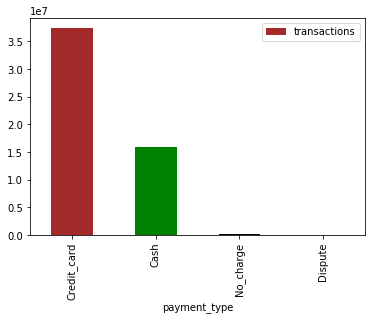

In [7]:
ex.plot.bar(color= ('brown', 'g', 'black', 'y'))

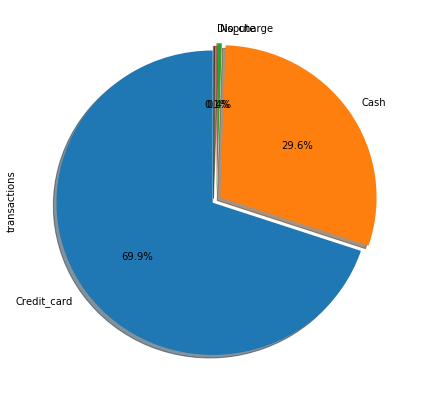

In [8]:
plt.figure(figsize=(7,7))
explode = (0.03, 0.03, 0.03, 0.03) 
#ax1 = plt.subplot(121, aspect='equal')
ex['transactions'].plot.pie(autopct='%1.1f%%', explode = explode, startangle=90, shadow=True, legend = False, fontsize=10)


__BOROUGH ANALYSIS__

In [9]:
#converting dictionaries to Dataframes

my1 = pd.DataFrame.from_dict(p1, orient='index', dtype=None, columns=['Credit_card'])
my2 = pd.DataFrame.from_dict(p2, orient='index', dtype=None, columns=['Cash'])
my3 = pd.DataFrame.from_dict(p3, orient='index', dtype=None, columns=['No_charge'])
my4 = pd.DataFrame.from_dict(p4, orient='index', dtype=None, columns=['Dispute'])
my5 = pd.DataFrame.from_dict(p5, orient='index', dtype=None, columns=['Unknown'])
my6 = pd.DataFrame.from_dict(p6, orient='index', dtype=None, columns=['Voided trip'])

#Merging the Dataframes
result = pd.concat([my1, my2, my3], axis=1)
my4 = my4.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my4)
my5 = my5.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my5)
my6 = my6.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my6)
result = result.rename(index={0: 'Manhattan', 1: 'Queens', 2: 'EWR', 3:'Bronx', 4: 'Staten Island', 5:'Brooklyn', 6:'Unknown'})
result

,Credit_card,Cash,No_charge,Dispute,Unknown,Voided trip
Manhattan,0.697922,0.297067,0.003886,0.001125,0.0,0.0
Queens,0.692416,0.297990,0.007537,0.002058,0.0,0.0
EWR,0.769363,0.165049,0.056867,0.008721,0.0,0.0
Bronx,0.562484,0.421057,0.013093,0.003366,0.0,0.0
Staten Island,0.556811,0.387296,0.046982,0.008911,0.0,0.0
Brooklyn,0.656145,0.333015,0.008747,0.002093,0.0,0.0
Unknown,0.690898,0.297848,0.009663,0.001590,0.0,0.0


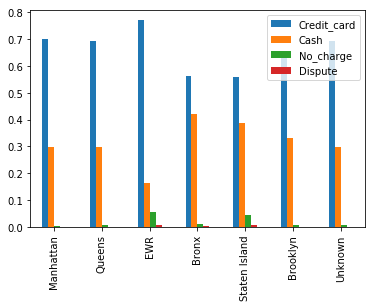

In [10]:
result.plot.bar(y = ['Credit_card', 'Cash','No_charge', 'Dispute'])

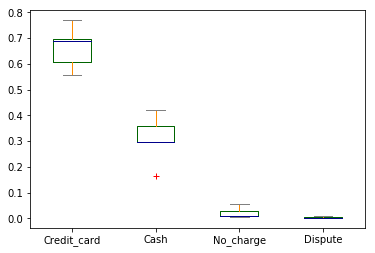

In [11]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
result.plot.box(y = ['Credit_card', 'Cash','No_charge', 'Dispute'], color = color, sym='r+')

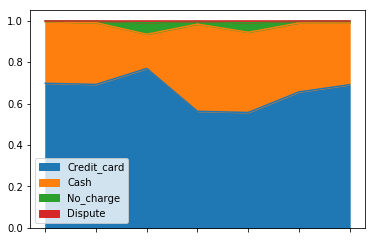

In [12]:
result.plot.area(y = ['Credit_card', 'Cash','No_charge', 'Dispute'])

__CHI SQUARED ANALYSIS__

In [13]:
#Converting dictionaries to Dataframes
my1 = pd.DataFrame.from_dict(p1_chi, orient='index', dtype=None, columns=['Credit_card'])
my2 = pd.DataFrame.from_dict(p2_chi, orient='index', dtype=None, columns=['Cash'])
my3 = pd.DataFrame.from_dict(p3_chi, orient='index', dtype=None, columns=['No_charge'])
my4 = pd.DataFrame.from_dict(p4_chi, orient='index', dtype=None, columns=['Dispute'])
my5 = pd.DataFrame.from_dict(p5_chi, orient='index', dtype=None, columns=['Unknown'])
my6 = pd.DataFrame.from_dict(p6_chi, orient='index', dtype=None, columns=['Voided trip'])

#Merging the Dataframes in a single one
result = pd.concat([my1, my2, my3], axis=1)
my4 = my4.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my4)
my5 = my5.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my5)
my6 = my6.reset_index(drop=True)
result = result.reset_index(drop=True)
result = result.join(my6)
result = result.rename(index={0: 'Manhattan', 1: 'Queens', 2: 'EWR', 3:'Bronx', 4: 'Staten Island', 5:'Brooklyn', 6:'Unknown'})


In [14]:
#taking only the two main payment types
chi = result.loc[:, ['Credit_card', 'Cash']]
chi

,Credit_card,Cash
Manhattan,34114938,14394194
Queens,2285527,960691
EWR,863,199
Bronx,26786,24212
Staten Island,321,279
Brooklyn,437319,226157
Unknown,554313,238586


In [15]:
#variables to find the Chi Squared value
chi_cc = chi.Credit_card.sum()   #total of val in Credit_card 
chi_ca = chi.Cash.sum()          #total of val in Cash 
chi_total = chi_cc + chi_ca      #total values in data
chi_rows = chi.sum(axis=1)       #total of val in each rows

In [16]:
#INITIAL HYPOTESIS
# H_0 = 'The Boroughs and payment type are not correlated'
# H_1 = 'The Boroughs and payment type are correlated'

chi_value = 0
for i in range(7):
    expected_freq = (chi_rows[i] * chi_cc) / chi_total
    chi_value = chi_value + (expected_freq - chi.Credit_card[i])**2 / expected_freq   
    expected_freq = (chi_rows[i] * chi_ca) / chi_total
    chi_value = chi_value + (expected_freq - chi.Cash[i])**2 / expected_freq

chi_value

13999.567938871589

P(chi > 13999.567938871589) = 0.00000   -> the initial assumption H_0 is rejected. 
Boroughs and payment types are strongly correlated.